In [1]:
#import necessary libraries 
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets 
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from PIL import Image, ImageOps

In [2]:
#define the hyperparameters
learning_rate = 0.001
num_epochs = 10
batch_size = 64

In [3]:
#use torchvision to load the MNIST dataset
transform = transforms.ToTensor()
train_dataset = datasets.MNIST('./data', train = True, transform = transform, download = True)
test_dataset = datasets.MNIST(root = './data', train = False, transform= transform)
train_loader = DataLoader(dataset= train_dataset, batch_size= batch_size, shuffle = True)
test_loader= DataLoader(dataset = test_dataset, batch_size=batch_size, shuffle = False)

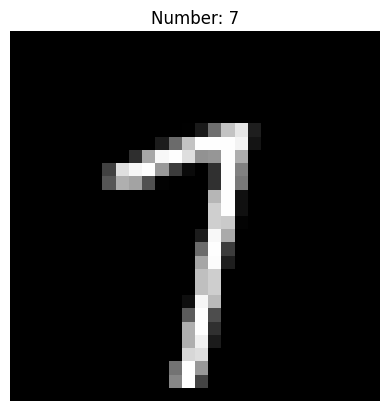

In [4]:
#Accessing a single image and its label
image, label = train_dataset[42]
#convert the tensor image to a Numpy array for visualization
image = image.squeeze().numpy() #remove extra dimensions if any

#plot the image 
plt.imshow(image, cmap = 'gray')
plt.title(f"Number: {label}")
plt.axis('off')
plt.show()


In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linearRelu = nn.Sequential(
            nn.Linear(28*28, 512), 
            nn.ReLU(),
            nn.Linear(512, 500),
            nn.ReLU(),
            nn.Linear(500, 10)
        )

    def forward(self, x):  # Make sure indentation is correct
        x = self.flatten(x)
        logits = self.linearRelu(x)
        return logits


In [6]:
#instantiate the model and move it to gpu if available 
device = "cuda" if torch.cuda.is_available() else "cpu"
model = NeuralNetwork().to(device)
print(f"Using {device} device")

Using cpu device


In [7]:
#define loss function and optimizer 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


In [8]:
#Training loop 
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        #forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        #backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
        

Epoch [1/10], Loss: 0.0597
Epoch [2/10], Loss: 0.0382
Epoch [3/10], Loss: 0.0275
Epoch [4/10], Loss: 0.0569
Epoch [5/10], Loss: 0.0010
Epoch [6/10], Loss: 0.0011
Epoch [7/10], Loss: 0.0013
Epoch [8/10], Loss: 0.0024
Epoch [9/10], Loss: 0.0789
Epoch [10/10], Loss: 0.0007


In [9]:
#Model Evaluation
def check_accuracy(loader, model):
    if loader.dataset.train:
        print("Checking accuracy on training data.")
    else:
        print("Checking accuracy on test data.")
    
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x,y in loader:
            x, y = x.to(device), y.to(device)
            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
    print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}")
    
    model.train()

check_accuracy(train_loader, model)
check_accuracy(test_loader, model)



Checking accuracy on training data.
Got 59704 / 60000 with accuracy 99.51
Checking accuracy on test data.
Got 9805 / 10000 with accuracy 98.05


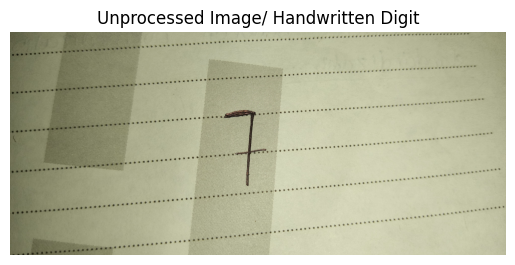

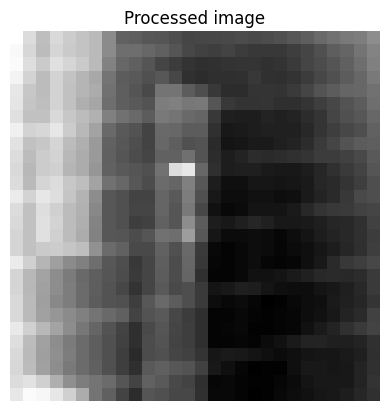

In [16]:
path = "C:\\Users\\Asus\\Desktop\\ML\\Deep-Learning\\data\\MNIST\\handwritten_digit.jpg"
# image = Image.open(path).convert('L')

def preprocess_image(image_path):
    #Load the image
    global image
    image = Image.open(image_path).convert('L') #Convert to grayscale
    
    # Invert colors (MNIST expects white digits on black background)
    image = ImageOps.invert(image)

    #Resize to 28 * 28
    image = image.resize((28,28))

    #Normalize and transform to tensor
    local_transform = transforms.Compose([
        transforms.ToTensor(), #Convert to tensor
        transforms.Normalize((0.5, ), (0.5, )) #Normalize to [-1,1]
    ])
    return local_transform(image).unsqueeze(0), image #Add batch dimension
preprocessed_tensor, processed_image = preprocess_image(path)
#Display the unprocessed image
img = mpimg.imread(path)
plt.imshow(img)
plt.title("Unprocessed Image/ Handwritten Digit")
plt.axis('off') # Turn off the axes for better visualization
plt.show()

#Display the processed image
plt.imshow(processed_image, cmap = 'gray')
plt.title("Processed image")
plt.axis('off')
plt.show()


In [11]:

#Function to check if the model correctly predicts our own handwritten digits or not
def predict_digit(model, image_path):
    #preprocess the image
    input_tensor, processed_image = preprocess_image(image_path)

    #visualize the image
    plt.imshow(input_tensor.squeeze().numpy(), cmap = 'gray')
    plt.title("Uploaded Image")
    plt.axis('off')
    plt.show()

    #Perform prediction
    model.eval()
    with torch.no_grad():
        output = model(input_tensor)
        predicted = torch.argmax(output, 1).item()
    
    print(f"Predicted Digit: {predicted}")
    


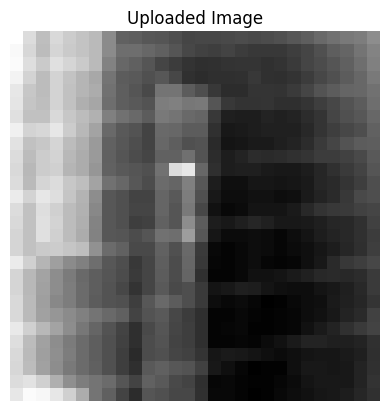

Predicted Digit: 7


In [12]:
predict_digit(model, path)
